In [1]:
import pandas as pd

### 3월 데이터만 잘라내기
jeju_card = jeju_card[jeju_card['REG_YYMM']==202003]

In [11]:
jeju_card = pd.read_csv('../../JEJU_D~1/jeju03.csv') # 잘라낸 데이터를 따로 받아 사용

1. 1인가구
2. 영유아자녀가구
3. 중고생자녀가구
4. 성인자녀가구
5. 노년가구

In [13]:
jeju_card.rename(columns = {'REG_YYMM':'date', 'CARD_CCG_NM':'use_region','HOM_CCG_NM':'live_region','SEX_CTGO_CD':'gender',}, inplace = True)

In [18]:
jeju_card.head()

,Unnamed: 0,date,CARD_SIDO_NM,use_region,STD_CLSS_NM,HOM_SIDO_NM,live_region,AGE,gender,FLC,CSTMR_CNT,AMT,CNT
0,23437284,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,6,2529000,6
1,23437285,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,10,1133650,9
2,23437286,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,3,570800,3
3,23437287,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,25,4192828,25
4,23437288,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3358900,24


In [24]:
jeju_card['STD_CLSS_NM']

0          건강보조식품 소매업
1          건강보조식품 소매업
2          건강보조식품 소매업
3          건강보조식품 소매업
4          건강보조식품 소매업
              ...    
1260503      휴양콘도 운영업
1260504      휴양콘도 운영업
1260505      휴양콘도 운영업
1260506      휴양콘도 운영업
1260507      휴양콘도 운영업
Name: STD_CLSS_NM, Length: 1260508, dtype: object

In [32]:
pd.value_counts(jeju_card['AGE'])

40s    294286
30s    286008
20s    255136
50s    229047
60s    133903
70s     44330
10s     17798
Name: AGE, dtype: int64

In [33]:
pd.value_counts(jeju_card['FLC'])

2    318095
4    280665
1    280211
3    203304
5    178233
Name: FLC, dtype: int64

In [34]:
pd.value_counts(jeju_card['CARD_SIDO_NM'])

서울    335651
경기    292836
부산     92223
인천     66149
경남     65540
충남     59140
강원     53479
경북     50346
전남     46178
충북     41226
전북     40681
대구     29608
대전     25185
광주     22580
제주     17902
울산     17093
세종      4691
Name: CARD_SIDO_NM, dtype: int64

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

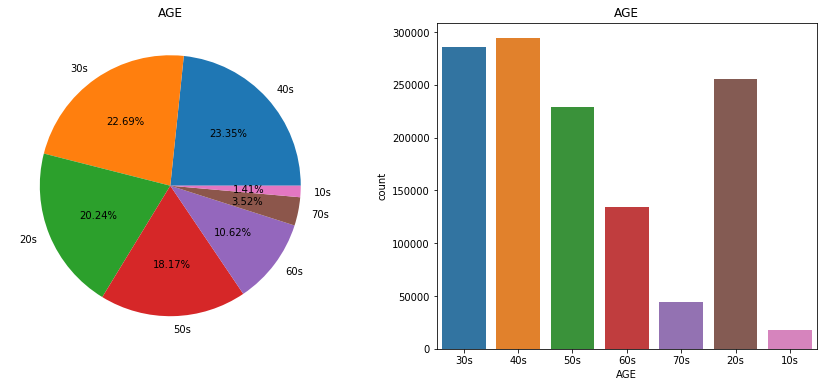

In [66]:
f,ax=plt.subplots(1,2,figsize=(15,6))

jeju_card['AGE'].value_counts().plot.pie(explode=[0,0,0,0,0,0,0],
                                             autopct='%1.2f%%',ax=ax[0], pd.)
ax[0].set_title('AGE')
ax[0].set_ylabel('')

sns.countplot('AGE', data=jeju_card,ax=ax[1])
ax[1].set_title('AGE')
plt.show()

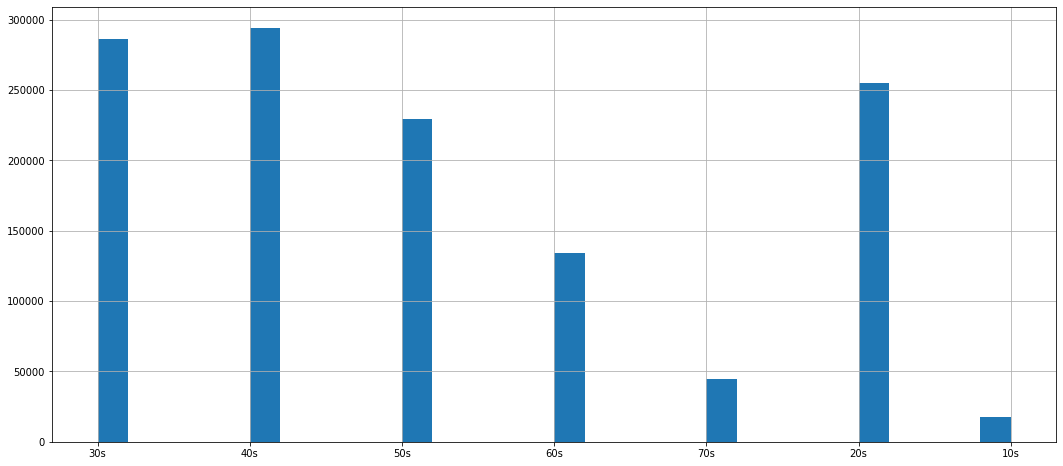

In [67]:
jeju_card['AGE'].hist(bins=30, figsize=(18,8))

In [68]:
jeju_card.corr()

,Unnamed: 0,date,gender,FLC,CSTMR_CNT,AMT,CNT
Unnamed: 0,1.000000,NaN,0.002979,-0.007395,-0.005431,-0.006560,-0.002158
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,0.002979,NaN,1.000000,-0.027429,0.008489,-0.004884,-0.000710
FLC,-0.007395,NaN,-0.027429,1.000000,0.012188,0.042993,0.004211
CSTMR_CNT,-0.005431,NaN,0.008489,0.012188,1.000000,0.878696,0.928494
AMT,-0.006560,NaN,-0.004884,0.042993,0.878696,1.000000,0.813815
CNT,-0.002158,NaN,-0.000710,0.004211,0.928494,0.813815,1.000000


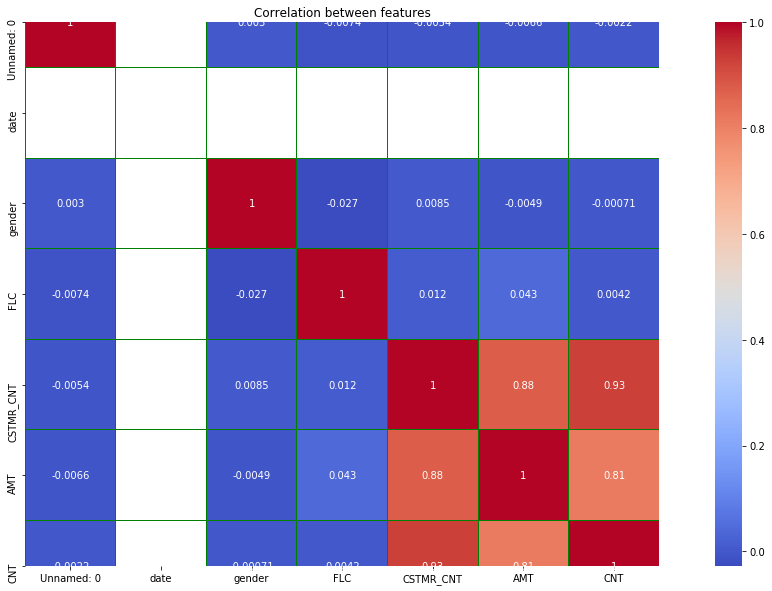

In [72]:
plt.figure(figsize=(20, 10))
sns.heatmap(jeju_card.corr(), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.coolwarm, linecolor="green")
plt.title('Correlation between features')
plt.show()

In [80]:
jeju_card2 = jeju_card.groupby('AGE').mean()

In [83]:
jeju_card2

,Unnamed: 0,date,gender,FLC,CSTMR_CNT,AMT,CNT,AMT/ONE
AGE,,,,,,,,
10s,2.408952e+07,202003.0,1.503821,1.000000,49.576188,6.451053e+05,101.614170,13012.402922
20s,2.407789e+07,202003.0,1.445131,1.173096,59.642551,1.584678e+06,139.165261,26569.585397
30s,2.406466e+07,202003.0,1.390608,1.876003,62.213022,2.221585e+06,134.710477,35709.323797
40s,2.406257e+07,202003.0,1.373202,3.022026,64.603314,2.891194e+06,139.971093,44753.031668
50s,2.406861e+07,202003.0,1.382363,3.955450,80.774946,4.025211e+06,168.961811,49832.419665
60s,2.406293e+07,202003.0,1.379185,5.000000,68.525687,3.697644e+06,141.266745,53959.975767
70s,2.405897e+07,202003.0,1.407489,5.000000,49.209610,2.679388e+06,103.289330,54448.463358


In [84]:
jeju_card2['AMT/PERSON'] = jeju_card2['AMT']/jeju_card2['CSTMR_CNT']

In [85]:
jeju_card2['AMT/ONE'] = jeju_card2['AMT']/jeju_card2['CNT']

In [86]:
jeju_card2

,Unnamed: 0,date,gender,FLC,CSTMR_CNT,AMT,CNT,AMT/ONE,AMT/PERSON
AGE,,,,,,,,,
10s,2.408952e+07,202003.0,1.503821,1.000000,49.576188,6.451053e+05,101.614170,6348.576553,13012.402922
20s,2.407789e+07,202003.0,1.445131,1.173096,59.642551,1.584678e+06,139.165261,11387.021828,26569.585397
30s,2.406466e+07,202003.0,1.390608,1.876003,62.213022,2.221585e+06,134.710477,16491.552870,35709.323797
40s,2.406257e+07,202003.0,1.373202,3.022026,64.603314,2.891194e+06,139.971093,20655.651973,44753.031668
50s,2.406861e+07,202003.0,1.382363,3.955450,80.774946,4.025211e+06,168.961811,23823.199831,49832.419665
60s,2.406293e+07,202003.0,1.379185,5.000000,68.525687,3.697644e+06,141.266745,26174.910270,53959.975767
70s,2.405897e+07,202003.0,1.407489,5.000000,49.209610,2.679388e+06,103.289330,25940.604246,54448.463358


In [88]:
jeju_card2 = jeju_card2.drop(['Unnamed: 0','date','gender','FLC'], axis=1)

In [92]:
jeju_card2

,CSTMR_CNT,AMT,CNT,AMT/ONE,AMT/PERSON
AGE,,,,,
10s,49.576188,6.451053e+05,101.614170,6348.576553,13012.402922
20s,59.642551,1.584678e+06,139.165261,11387.021828,26569.585397
30s,62.213022,2.221585e+06,134.710477,16491.552870,35709.323797
40s,64.603314,2.891194e+06,139.971093,20655.651973,44753.031668
50s,80.774946,4.025211e+06,168.961811,23823.199831,49832.419665
60s,68.525687,3.697644e+06,141.266745,26174.910270,53959.975767
70s,49.209610,2.679388e+06,103.289330,25940.604246,54448.463358


In [96]:
jeju_card2 = jeju_card2.reset_index()

In [138]:
train_pre = jeju_card2[['AGE','AMT','AMT/ONE','AMT/PERSON']]
train_pre

,AGE,AMT,AMT/ONE,AMT/PERSON
0,10s,6.451053e+05,6348.576553,13012.402922
1,20s,1.584678e+06,11387.021828,26569.585397
2,30s,2.221585e+06,16491.552870,35709.323797
3,40s,2.891194e+06,20655.651973,44753.031668
4,50s,4.025211e+06,23823.199831,49832.419665
5,60s,3.697644e+06,26174.910270,53959.975767
6,70s,2.679388e+06,25940.604246,54448.463358


In [139]:
tmp = []
for each in train_pre['AGE']:
    if each == '10s':
        tmp.append(10)
    elif each == '20s':
        tmp.append(20)
    elif each == '30s':
        tmp.append(30)
    elif each == '40s':
        tmp.append(40)
    elif each == '50s':
        tmp.append(50)
    elif each == '60s':
        tmp.append(60)
    elif each == '70s':
        tmp.append(70)
    else:
        tmp.append(np.nan)

In [140]:
train_pre['AGE'] = tmp
train_pre

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,AGE,AMT,AMT/ONE,AMT/PERSON
0,10,6.451053e+05,6348.576553,13012.402922
1,20,1.584678e+06,11387.021828,26569.585397
2,30,2.221585e+06,16491.552870,35709.323797
3,40,2.891194e+06,20655.651973,44753.031668
4,50,4.025211e+06,23823.199831,49832.419665
5,60,3.697644e+06,26174.910270,53959.975767
6,70,2.679388e+06,25940.604246,54448.463358


In [141]:
train_pre2 = train_pre.drop(['AGE'], axis=1)
train_pre2

,AMT,AMT/ONE,AMT/PERSON
0,6.451053e+05,6348.576553,13012.402922
1,1.584678e+06,11387.021828,26569.585397
2,2.221585e+06,16491.552870,35709.323797
3,2.891194e+06,20655.651973,44753.031668
4,4.025211e+06,23823.199831,49832.419665
5,3.697644e+06,26174.910270,53959.975767
6,2.679388e+06,25940.604246,54448.463358


In [ ]:
train_pre['AGE'] = train_pre['AGE'].astype('float')

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pre2, 
                                                    train_pre[['AGE']], 
                                                    test_size=0.2, 
                                                    random_state=13)

In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 4 to 2
Data columns (total 3 columns):
AMT           5 non-null float64
AMT/ONE       5 non-null float64
AMT/PERSON    5 non-null float64
dtypes: float64(3)
memory usage: 160.0 bytes


In [161]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=19)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 1.0


In [162]:
train_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
AGE           7 non-null float64
AMT           7 non-null float64
AMT/ONE       7 non-null float64
AMT/PERSON    7 non-null float64
dtypes: float64(4)
memory usage: 352.0 bytes


In [163]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="jeju_card2.dot",
        feature_names=['AMT','AMT/ONE','AMT/PERSON'],
        class_names=['10s','20s','30s','40s','50s','60s','70s'],
        rounded=True,
        filled=True
    )

In [164]:
import graphviz
with open("jeju_card2.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='jeju_card_tree', directory='images/decision_trees', cleanup=True)
dot
print('됨')

됨


In [180]:
jeju_card

,Unnamed: 0,date,CARD_SIDO_NM,use_region,STD_CLSS_NM,HOM_SIDO_NM,live_region,AGE,gender,FLC,CSTMR_CNT,AMT,CNT,AMT/CST
0,23437284,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,1,2,6,2529000,6,421500.000000
1,23437285,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,3,10,1133650,9,113365.000000
2,23437286,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,2,3,3,570800,3,190266.666667
3,23437287,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50,1,4,25,4192828,25,167713.120000
4,23437288,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50,2,4,21,3358900,24,159947.619048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260503,24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30,1,2,3,43300,4,14433.333333
1260504,24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40,1,3,3,35000,3,11666.666667
1260505,24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50,1,4,4,188000,6,47000.000000
1260506,24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50,2,4,4,99000,6,24750.000000


In [179]:
jeju_card['AMT/CST'] = jeju_card['AMT']/jeju_card['CSTMR_CNT']

In [166]:
tmp = []
for each in jeju_card['AGE']:
    if each == '10s':
        tmp.append(10)
    elif each == '20s':
        tmp.append(20)
    elif each == '30s':
        tmp.append(30)
    elif each == '40s':
        tmp.append(40)
    elif each == '50s':
        tmp.append(50)
    elif each == '60s':
        tmp.append(60)
    elif each == '70s':
        tmp.append(70)
    else:
        tmp.append(np.nan)

In [169]:
jeju_card['AGE'] = tmp
jeju_card

,Unnamed: 0,date,CARD_SIDO_NM,use_region,STD_CLSS_NM,HOM_SIDO_NM,live_region,AGE,gender,FLC,CSTMR_CNT,AMT,CNT
0,23437284,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,1,2,6,2529000,6
1,23437285,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,3,10,1133650,9
2,23437286,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,2,3,3,570800,3
3,23437287,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50,1,4,25,4192828,25
4,23437288,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50,2,4,21,3358900,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260503,24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30,1,2,3,43300,4
1260504,24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40,1,3,3,35000,3
1260505,24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50,1,4,4,188000,6
1260506,24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50,2,4,4,99000,6


In [186]:
jeju_card3 = jeju_card.drop(['Unnamed: 0','date','CARD_SIDO_NM','use_region','STD_CLSS_NM','HOM_SIDO_NM','live_region','CNT'], axis=1)

In [187]:
jeju_card3

,AGE,gender,FLC,CSTMR_CNT,AMT,AMT/CST
0,30,1,2,6,2529000,421500.000000
1,40,1,3,10,1133650,113365.000000
2,40,2,3,3,570800,190266.666667
3,50,1,4,25,4192828,167713.120000
4,50,2,4,21,3358900,159947.619048
...,...,...,...,...,...,...
1260503,30,1,2,3,43300,14433.333333
1260504,40,1,3,3,35000,11666.666667
1260505,50,1,4,4,188000,47000.000000
1260506,50,2,4,4,99000,24750.000000


In [188]:
jeju_card4 = jeju_card3.drop(['AGE'], axis=1)

In [189]:
jeju_card4

,gender,FLC,CSTMR_CNT,AMT,AMT/CST
0,1,2,6,2529000,421500.000000
1,1,3,10,1133650,113365.000000
2,2,3,3,570800,190266.666667
3,1,4,25,4192828,167713.120000
4,2,4,21,3358900,159947.619048
...,...,...,...,...,...
1260503,1,2,3,43300,14433.333333
1260504,1,3,3,35000,11666.666667
1260505,1,4,4,188000,47000.000000
1260506,2,4,4,99000,24750.000000


In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(jeju_card4, 
                                                    jeju_card3[['AGE']], 
                                                    test_size=0.2, 
                                                    random_state=13)

In [198]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=13)
tree_clf.fit(X_train, y_train)

print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.7615117323776336


In [199]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="jeju_card3.dot",
        feature_names=['gender','FLC','CSTMR_CNT','AMT','AMT/CST'],
        class_names=['10s','20s','30s','40s','50s','60s','70s'],
        rounded=True,
        filled=True
    )

In [200]:
import graphviz
with open("jeju_card3.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='jeju_card3_tree', directory='images/decision_trees', cleanup=True)
dot
print('됨')

됨


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


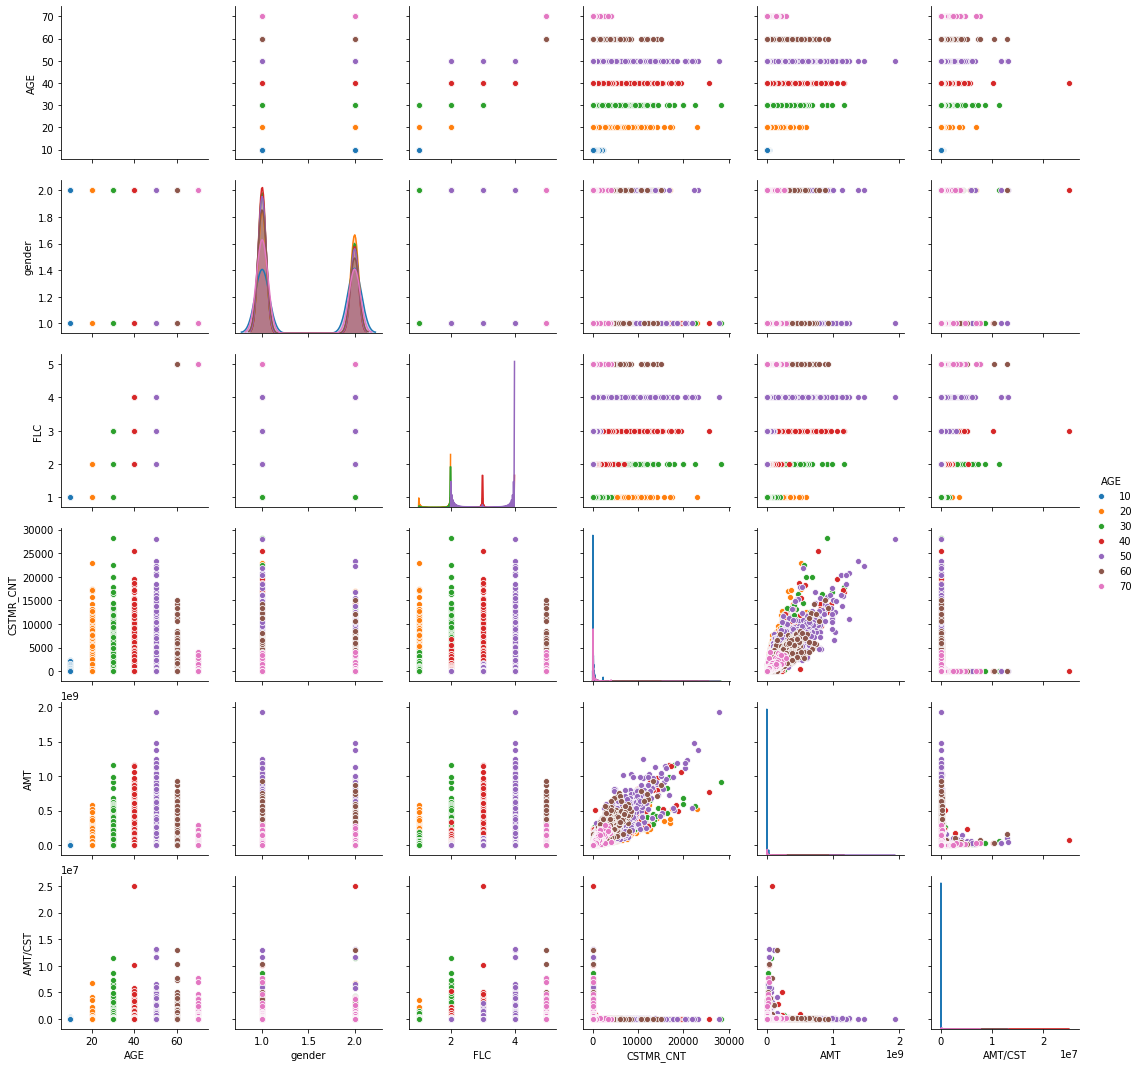

In [203]:
sns.pairplot(jeju_card3, hue='AGE')